До заданого датасету зробити візуалізацуію даних та додати нові фічі в ручному режимі.

Додатково, за бажанням можна робити проект:
https://drive.google.com/drive/folders/1n9hZ3wp1eimXbIHLXdeHtG8_D2Qorbiw?usp=sharing

In [558]:
# Підключаємо Google Drive з датасетом
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [559]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'png'

# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/hw_vis_dataset/"
players_df = pd.read_csv(datasets_path + "players.csv")
player_data_df = pd.read_csv(datasets_path + "player_data.csv")
seasons_stats_df = pd.read_csv(datasets_path + "seasons_stats.csv")

In [560]:
# Почнемо з першого датасету. Спочатку подивимось на його інфо
print("Players info:")
print(players_df.info(), "\n")

# та виведемо 5 перших записів
players_df.head()

Players info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB
None 



,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [561]:
# Для початку почистимо дані. Видалимо першу колонку, яка не має назви і корисних даних для нас.
players_df = players_df.loc[:, ~players_df.columns.str.contains("^Unnamed")]

# Тепер виправимо тип даних для поля `born` та замінемо NaN на 0
players_df["born"] = players_df["born"].fillna(0).astype("int16")
players_df.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky


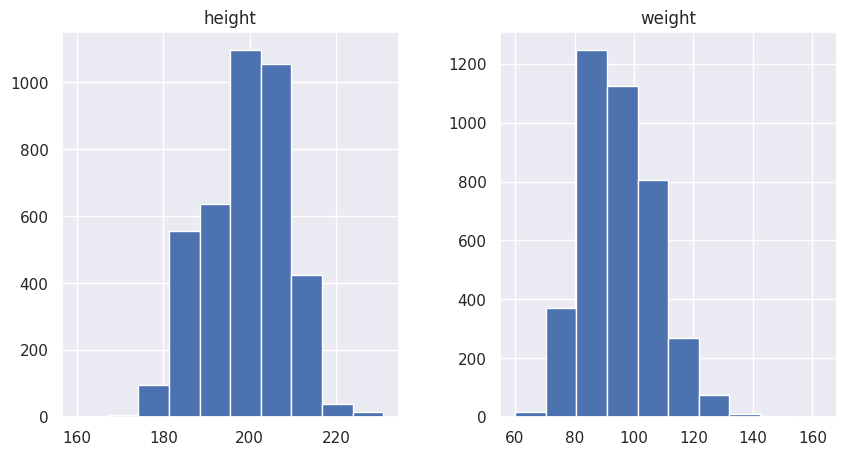

In [562]:
# Тепер почнемо займатися візуалізацією даних. Побудуємо гістограми для числових фіч датасету
players_df[["height", "weight"]].hist(figsize=(10, 5));

Поглянувши на гістограми можемо зробити наступні висновки:
- найбільша кількість баскетболістів мают зріст 200-210 см
- більшість з них важить 90-100 кг

Тут можемо побачити що розподіл фічей height та weight майже схожий на нормальний, але, можливо, є деякі деформації даних.

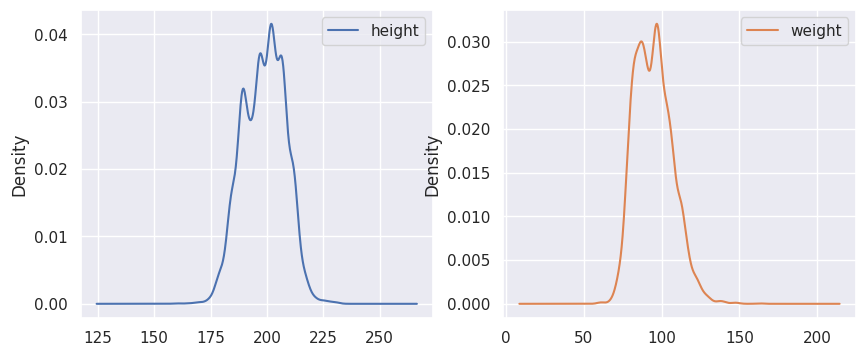

In [563]:
# Давайте побудуємо density plot, щоб подивитись більш ретельно на те, як розподілені дані
players_df[["height", "weight"]].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

Як ми можемо побачити ці фічі мають майже нормальний розподіл, але вверху графіків ми бачимо зміни деформації. Також графік для фічі `weight` витягнуто вправо. Тоже ми не можемо сказати що це розподілення Гауса, але, можливо, можно додатково почистити та нормалізувати дані, щоб забезпечити кращий розподіл.

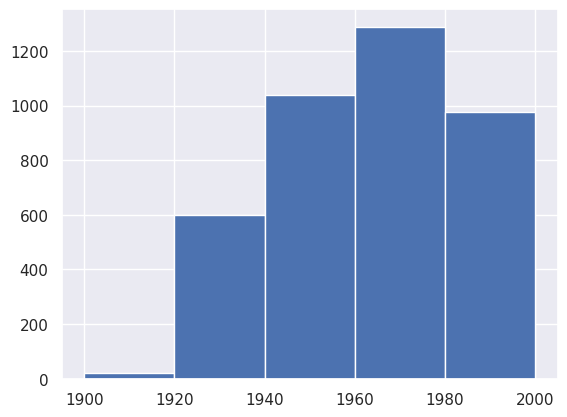

In [564]:
# Давайте побудуємо гістограму по даті народження усіх гравців із датасету
players_df["born"].hist(bins=[1900, 1920, 1940,1960, 1980,2000]);

Як можно побачити з цього графіку - більшість гравців народилися з 1960 до 1980 року.
Стосовно року нарождення можно зробити наступне припущення - такий розподіл може бути пов'язаний з історією баскетболу. Згідно за статтею https://en.wikipedia.org/wiki/History_of_basketball баскетбол почав набувати популярність у світі професіонального спорту з 1932 року, коли було сформовано FIBA. Згодом, у 1946-му, було засновано Американську Баксетбольну Ассоціацію (BAA), яка згодом була поєднана з NBL та парайменована у NBA у 1949р. Все це сприяло розвитку баскетболу як світового спорту, тому ми бачемо поступову зростаючу кількість майбутніх баскетболістів, які народилися саме з початку цього періоду.

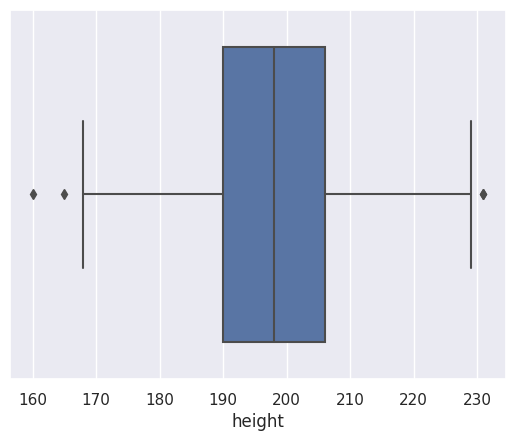

In [565]:
# Теперь давайте побудуємо боксплот для фічі `height`, щоб побачити чи є якісь аутлейери (статистичні викиди)
sns.boxplot(x="height", data=players_df);

Бачимо, що є декілька гравців у яких зріст менше ніж 170 см. Це цікава деталь, тому що такий зріст не є типовим для гравців у баскетбол.
Точніше, офіційних обмежень щодо зросту немає, але згідно з https://www.lines.com/guides/average-height-nba-players/1519 все ж таки в середньому ріст гравця перевищує 180 см. Таких ауйтлейерів не багато, тому мабуть їх можно безболізно видалити, щоб трохи нормалізувати дані.

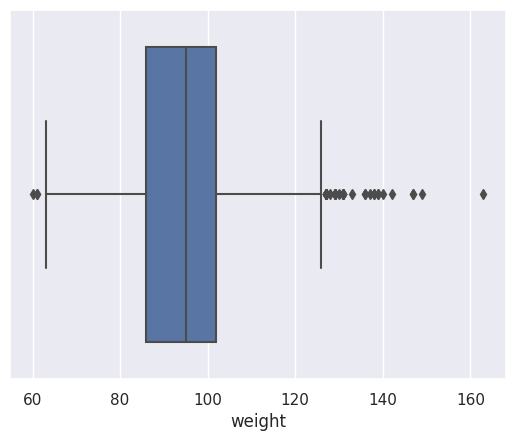

In [566]:
# let's build boxplot for numeric features
sns.boxplot(x="weight", data=players_df);

Також цікава деталь - є гравці, вага яких перевищує 120 кг і навіть 160 кг. Це цікаво тому, що згідно з статтею https://hortonbarbell.com/average-height-and-weight-of-nba-players/ максимальною вагою для NBA гравців, не зважаючи на позицію гравця, є вага до 120 кг. Тут аутлейерів вже більше, тому вони можуть потенційно більше впливати на розподіл, тоже їх також мабуть можно видалити, або нормалізувати.

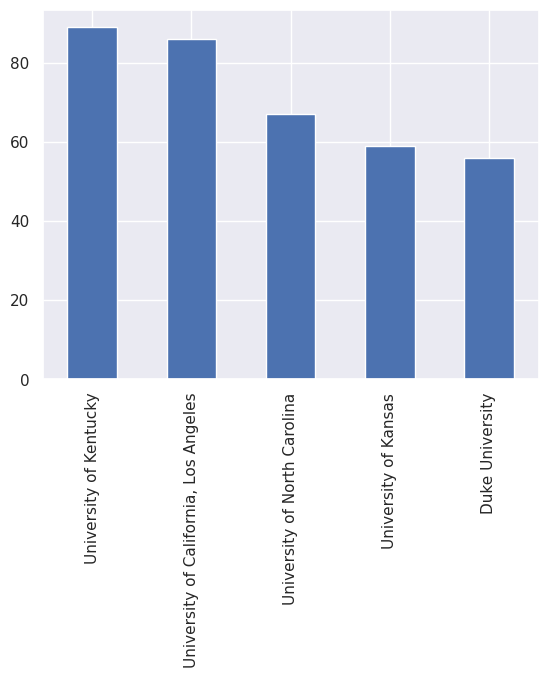

In [567]:
# Давайте подивимось коледжів, випускниками яких являються гравці
players_df["collage"].value_counts().nlargest(5).plot(kind="bar");

Як ми можемо побачити, найбільше баскетбольних гравців є випускниками University of Kentucky та University of California.
Це можна пояснити тим, що у цих закладах дуже сильно развинутий баскетбол та сильні баскетбольні команди закладу.
https://en.wikipedia.org/wiki/Kentucky_Wildcats_men%27s_basketball

https://en.wikipedia.org/wiki/UCLA_Bruins_men%27s_basketball

In [568]:
# Тепер давайте поглянемо на наступну частину датасету
player_data_df.info();
player_data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [569]:
# Зробимо необхідні перетворення
player_data_df.isna().sum()

# Давайте замінемо NaN на 0 для числових фічей
player_data_df["height"] = player_data_df["height"].fillna("0-0")
player_data_df["weight"] = player_data_df["weight"].fillna(0)
player_data_df["birth_date"] = player_data_df["birth_date"].fillna("Unknown")
player_data_df["college"] = player_data_df["college"].fillna("Unknown")

player_data_df.tail()

,name,year_start,year_end,position,height,weight,birth_date,college
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",Unknown
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",Unknown
4549,Matt Zunic,1949,1949,G-F,6-3,195.0,"December 19, 1919",George Washington University


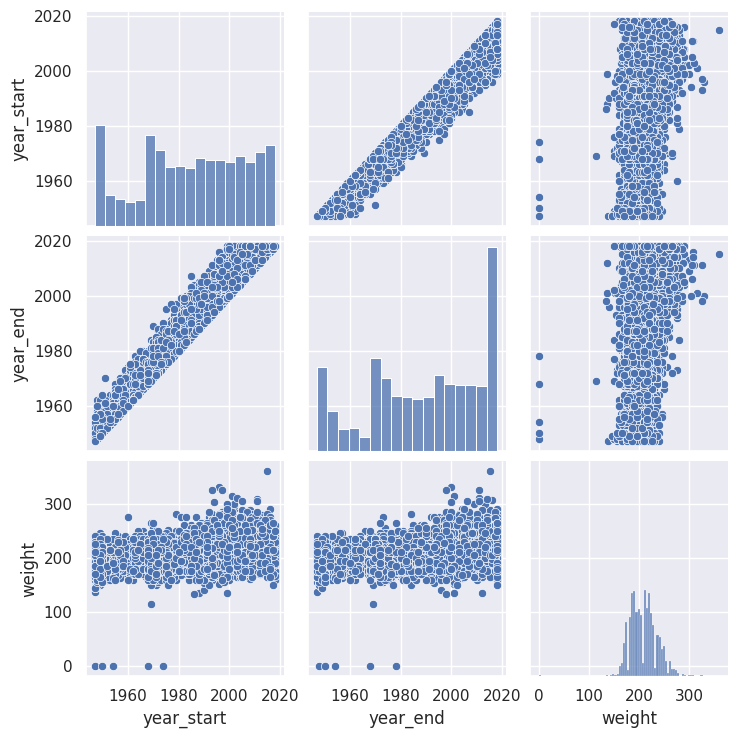

In [570]:
# Побудуємо pairplot
sns.pairplot(player_data_df[["year_start", "year_end", "height", "weight", "birth_date"]]);

З цього графіка бачимо, що фічі `year_start` та `year_end` очікувано корелюють, бо це тісно пов'язані дані. Можна спробувати прибрати одну з цих фіч, чи додати нову, наприклад, `total_years`, де буде значення `year_end - year_start`. Також можна побачити на графіку нульові дані, які ми додали під час прибирання NaN за датасету. Для більш сприятливої картинки такі дані можна нормалізувати, чи прибрати з датасету.

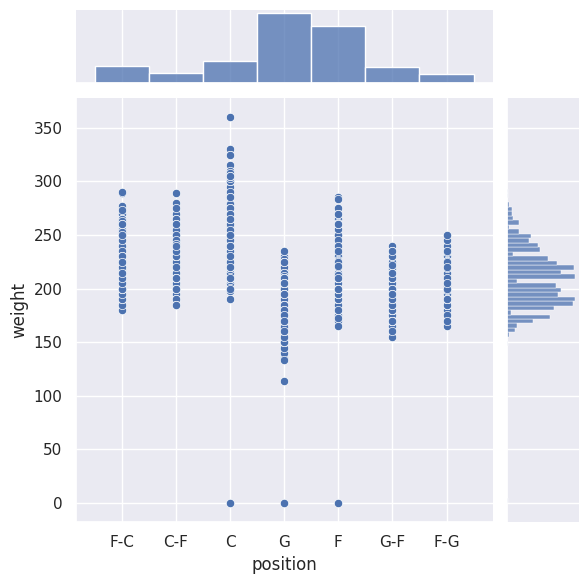

In [571]:
# Побудуємо joinplot щоб побачити розподіл position та залежніcть позиції від ваги гравця
sns.jointplot(x="position", y="weight", data=player_data_df, kind="scatter");

На цьому графіку бачимо, що фічі `weight` та `position` очікувано корелювати не можуть, бо `position` це категоріальна фіча. Але з цікавого що можемо побачи тут - це вплив ваги гравця на його позицію на полі. Більш легші гравці здебільшего грають на позиції G (Guard), а найвіжчі - на позиції С (Center).

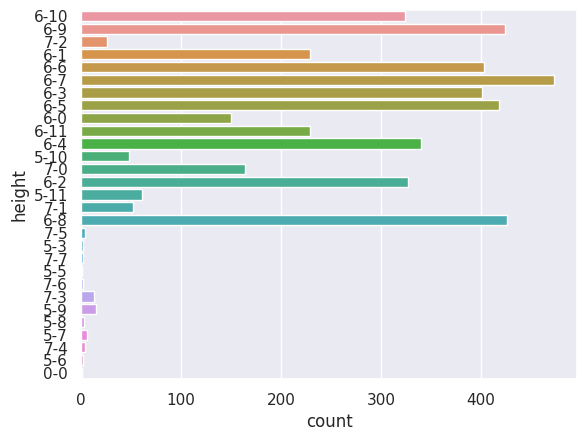

In [572]:
# також давайте побудуємо countplot та подивимось на зріст гравців
sns.countplot(y="height", data=player_data_df);

Як бачимо, неофіційна вимога стосовно six feet tall мабуть все ж таки мабуть є, бо більшість гравців вище 6 фунтів (182.88 см).

In [573]:
# Тепер попрацюємо з третьою частиною даних. Спочатку трохи почистимо датасет
seasons_stats_df = seasons_stats_df.loc[:, ~seasons_stats_df.columns.str.contains("^Unnamed")]
seasons_stats_df = seasons_stats_df.drop(["blanl", "blank2"], axis=1)  # видаляємо пусті колонки, вони нам не потрібні взагалі

In [574]:
print(seasons_stats_df.info());
seasons_stats_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  OWS     24585 non-null  float64
 21  DWS     24585 non-null  float64
 22

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [575]:
# Як ми бачимо, тут у нас багато значень NaN. Давайте замiнемо на 0, бо більщість колонок числові
print(seasons_stats_df.isna().sum())
seasons_stats_df = seasons_stats_df.fillna(0)

# Але для гравців ім'я 0 виглядає не дуже, тому давайте замінемо ці нулі на Unnamed.
# Теж не супер, але краще ніж 0. Або їх можно взагалі видалити, бо їх усього 67 при розмірі датасету в майже 25 тисяч
seasons_stats_df["Player"] = seasons_stats_df["Player"].replace(0, "Unnamed")

Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
GS        6458
MP         553
PER        590
TS%        153
3PAr      5852
FTr        166
ORB%      3899
DRB%      3899
TRB%      3120
AST%      2136
STL%      3899
BLK%      3899
TOV%      5109
USG%      5051
OWS        106
DWS        106
WS         106
WS/48      590
OBPM      3894
DBPM      3894
BPM       3894
VORP      3894
FG          67
FGA         67
FG%        166
3P        5764
3PA       5764
3P%       9275
2P          67
2PA         67
2P%        195
eFG%       166
FT          67
FTA         67
FT%        925
ORB       3894
DRB       3894
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PF          67
PTS         67
dtype: int64


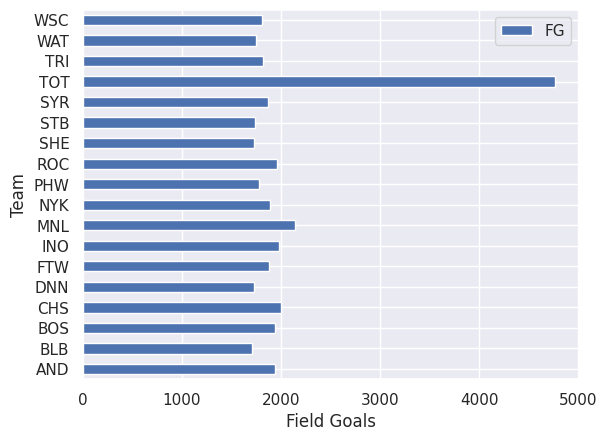

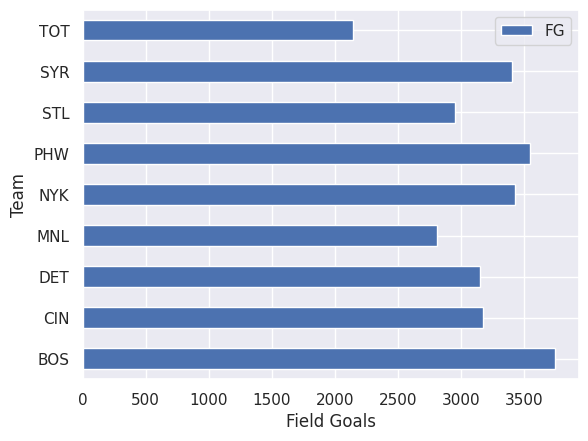

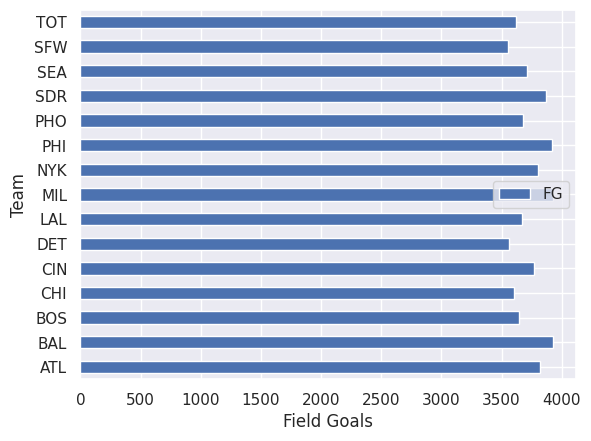

In [576]:
# Давайте побудуэмо графiк, який буде показувати кількість голів для кожної команди у сезоні (якщо я правильно зрозумів і Tm фіча це саме абревіатура команди)
# Наприклад, подивимось за 1950 рік та 1970 роки
aggr_result = seasons_stats_df.groupby(["Year", "Tm"])[["FG"]].agg("sum").reset_index()
aggr_result[aggr_result["Year"] == 1950].plot(x="Tm", y="FG", kind="barh", xlabel="Field Goals", ylabel="Team")
aggr_result[aggr_result["Year"] == 1960].plot(x="Tm", y="FG", kind="barh", xlabel="Field Goals", ylabel="Team");
aggr_result[aggr_result["Year"] == 1970].plot(x="Tm", y="FG", kind="barh", xlabel="Field Goals", ylabel="Team");

Якщо `Tm` це саме абревіатура команди, то можна побачити, що, наприклад, у 1950 TOT явно виділялась серед інших команд по кількості забитих м'ячів, а у 1970-му році боротьба між командами була вже більш щільною та напруженною. Це можна мабуть пов'язати з загальним розвитком баскетболу та більш ретельною підготовкою команд до гри у наступному сезоні.

In [577]:
# А теперь давайте побудуємо графік за допомогою Plotly, який зобразить кількість команд у різних сезонах
import plotly.graph_objects as go

by_seasons = aggr_result.groupby("Year")[["Tm"]].nunique().reset_index()
by_seasons = by_seasons.loc[by_seasons["Year"] != 0]

fig = go.Figure(
    data=go.Scatter(
        x=by_seasons.Year,
        y=by_seasons.Tm,
    ),

)
fig.update_layout(
    template='plotly_dark',
    title="Number of teams in the season",
    xaxis_title="Seasons",
    yaxis_title="Number of teams",
)
fig.show(renderer="colab")

Цікаво, але по цьому графіку бачимо що є "яма" у кількості команд, що брали участь у сезоні, починаючи у 1950-1960 роки. Це можно списати на нестабільність NBA після створення і на невелику популярність баскетболу в цілому в ті роки.
Більш детально можно подивитись у статях:
- https://apnews.com/article/ahmaud-arbery-nba-sports-boxing-race-and-ethnicity-316cc3269afbcaf80a42c31ef6661ebe#:~:text=The%201960s%20was%20the%20decade,%E2%80%9CBloody%20Sunday%2C%E2%80%9D%20Dr.
- https://apnews.com/article/mlb-nba-sports-baseball-racial-injustice-cd81a5b64be39578dfeccb6ae23e7221
- https://bleacherreport.com/articles/1554991-ranking-each-decade-of-nba-basketball-from-the-1960s-to-today

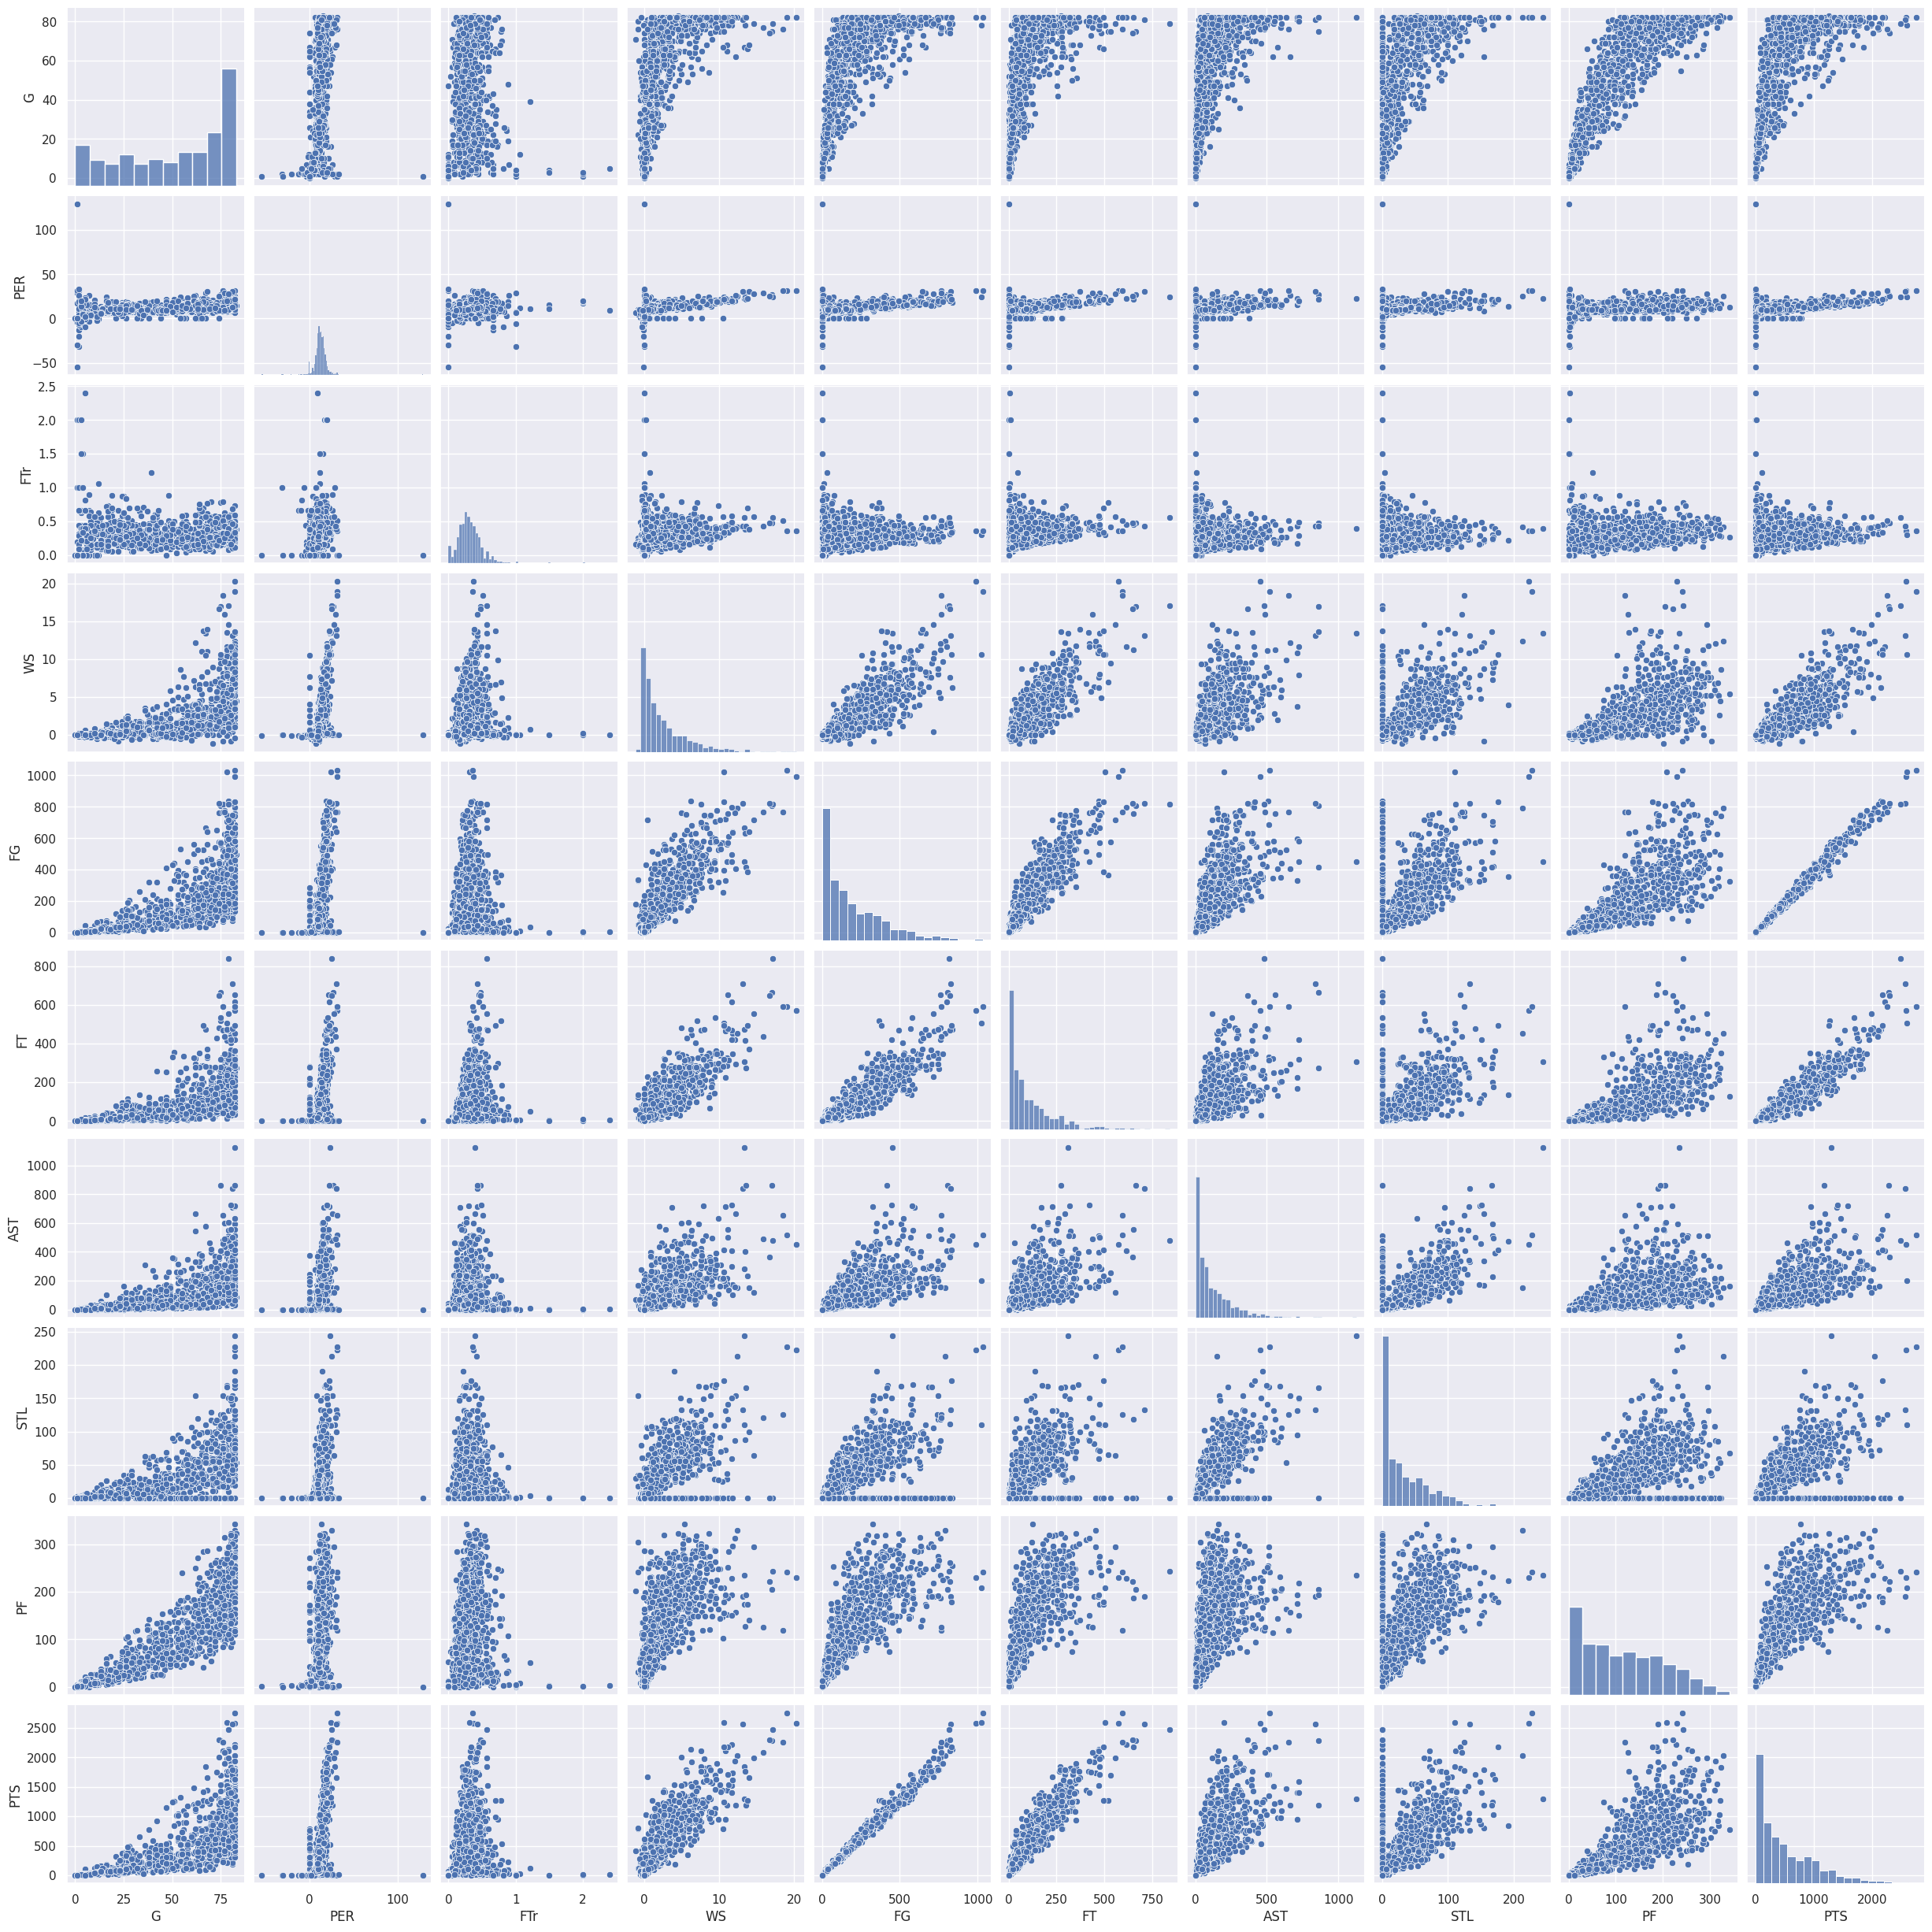

In [578]:
# Давайте побудуемо пейрплоты та подивимось які фічі корелюють.
# Але так як датасет дуже великий, то створимо графік тільки для деяких фічей і на даних у розмірі 1к записів
columns = [
  "G",
  "PER",
  "FTr",
  "WS",
  "FG",
  "FT",
  "AST",
  "STL",
  "PF",
  "PTS",
]
sns.pairplot(seasons_stats_df[columns].sample(1000))

Як ми бачимо з цього пейрплоту, фічу G можна описати майже до кожної фічі якимось графіком. Між собою наче корелюють FG та PTS, та щось схоже є у FT до PTS. На ці пари потрібно звернути додаткову увагу.

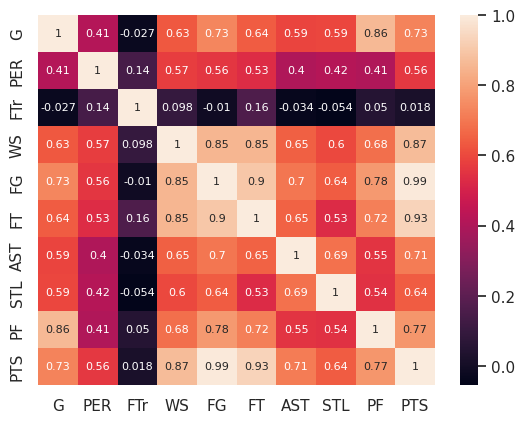

In [579]:
# Спробуємо також подивитись на хітмап для цих колонок
corr_matrix = seasons_stats_df[columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":8});

Завдяки хітмапу, побудованному на матриці корреляцій, можемо наглядніше побачити які фічі зовсім не корелюют між собою, а на які потрібно приділити більше уваги.

In [580]:
# Feature Engineering

# додамо до набору даних гравців колонку за индексом маси тіла
players_df["BMI"] = round(players_df["weight"] / ((players_df["height"] / 100) ** 2), 2)

# у датасеті player_data_df можна сгенерувати нову фічу years_total, як різницю між year_end та year_start
player_data_df["years_total"] = player_data_df["year_end"] - player_data_df["year_start"]

# також можна додати фічу out_age, яка буде описувати в якому в якому віці баскетболіст закінчив карьеру
player_data_df.drop(player_data_df[ (player_data_df["birth_date"] == "Unknown")].index , inplace=True)
player_data_df["birth_date"] = pd.to_datetime(player_data_df["birth_date"], format="%B %d, %Y")
player_data_df["retired_age"] = player_data_df["year_end"] - player_data_df["birth_date"].dt.year

# помержимо PER колонку з датасету seasons_stats_df до player_data_df по імені гравця
df = seasons_stats_df[["Player", "PER"]].rename(columns={"Player": "name"})
player_data_df = player_data_df.merge(df["PER"], how="left", left_index=True, right_index=True)

# теперь давайте объеднаємо фічі AST%, STL%, BLK%, TOV% та USG% у фічу ACT%, яка буде описувати загальну активність гравця
seasons_stats_df["ACT%"] = seasons_stats_df["AST%"] + seasons_stats_df["STL%"] + seasons_stats_df["BLK%"] + seasons_stats_df["TOV%"] + seasons_stats_df["USG%"]

players_df.head()

,Player,height,weight,collage,born,birth_city,birth_state,BMI
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN,23.77
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana,23.48
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN,23.09
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN,22.91
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky,24.93


In [581]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,years_total,retired_age,PER
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University,4,27,0.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University,9,32,0.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles",19,42,0.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University,10,32,0.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University,5,29,0.0


In [582]:
seasons_stats_df.tail()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ACT%
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,40.3
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,42.9
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,33.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,37.3
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0,44.3


# Автогенерація фіч

In [583]:
# встановлюємо Featuretools
!pip install featuretools

In [584]:
import featuretools as ft

In [585]:
# Featuretools не дозволяє використовуати індекс, в якому є пусті значення. Тож видяляємо такі з датасету players_df
players_df.drop(players_df[players_df["Player"].isna()].index, inplace=True)

In [586]:
# Вказуємо ім'я індексу для player_data_df
player_data_df.index.name = "player_data_id"

In [587]:
# Вказуємо ім'я індексу для seasona_stats_df
seasons_stats_df.index.name = "seasons_stats_id"

In [588]:
# Створюємо EntitySet з ідентифікатором basketball
es = ft.EntitySet(id="basketball")

In [589]:
from woodwork.logical_types import PersonFullName, Categorical

# У новій версії Featurtools API трохи змінилося. Додаємо датафрейми до EntitySet,
# вказуючи одразу логічні типи для колонок, які будуть автоматично конвертовані в Unknown тип.

es.add_dataframe(
    dataframe_name="players",
    dataframe=players_df,
    logical_types={
      "Player": PersonFullName,
      "birth_city": Categorical,
    },
)
es.add_dataframe(
    dataframe_name="player_data",
    dataframe=player_data_df,
    index="player_data_id",
    logical_types={
      "name": PersonFullName,
    },
)
es.add_dataframe(
    dataframe_name="seasons_stats",
    dataframe=seasons_stats_df,
    index="seasons_stats_id",
)

# Додаємо зв'язки
es = es.add_relationship("players", "Player", "player_data", "name")
es = es.add_relationship("players", "Player", "seasons_stats", "Player")

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1894: UserWarning:

Using first column as index. To change this, specify the index parameter

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1910: UserWarning:

index player_data_id not found in dataframe, creating new integer column

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1910: UserWarning:

index seasons_stats_id not found in dataframe, creating new integer column

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:414: UserWarning:

Logical type Categorical for child column Player does not match parent column Player logical type PersonFullName. Changing child logical type to match parent.



In [590]:
# Подивимось на схеми датасетів, щоб впевнетись, що ми не маємо Unknown типів
es["players"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
Player,PersonFullName,['index']
height,Double,['numeric']
weight,Double,['numeric']
collage,Categorical,['category']
born,Integer,['numeric']
birth_city,Categorical,['category']
birth_state,Categorical,['category']
BMI,Double,['numeric']


In [591]:
es["player_data"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
player_data_id,Integer,['index']
name,PersonFullName,['foreign_key']
year_start,Integer,['numeric']
year_end,Integer,['numeric']
position,Categorical,['category']
height,Categorical,['category']
weight,Double,['numeric']
birth_date,Datetime,[]
college,Categorical,['category']


In [592]:
es["seasons_stats"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
seasons_stats_id,Integer,['index']
Year,Double,['numeric']
Player,PersonFullName,['foreign_key']
Pos,Categorical,['category']
Age,Double,['numeric']
Tm,Categorical,['category']
G,Double,['numeric']
GS,Double,['numeric']
MP,Double,['numeric']


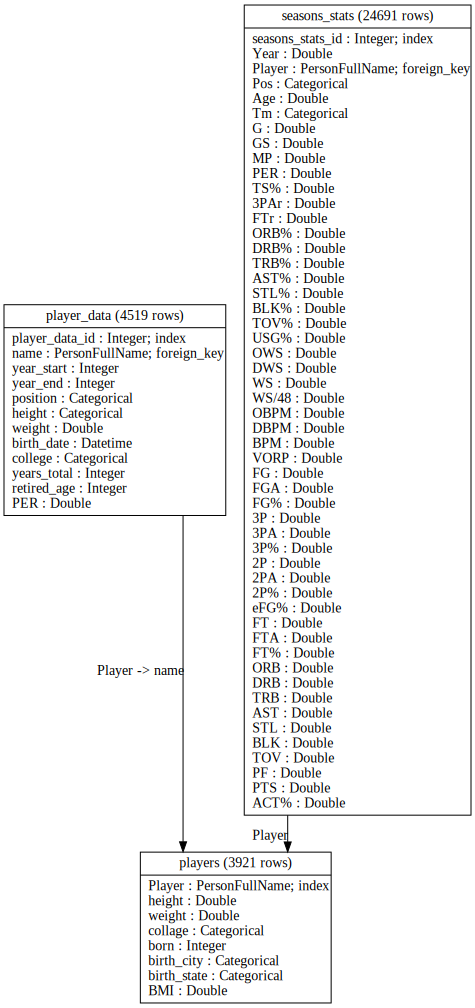

In [593]:
# Побудуємо діаграму зв'язків
es.plot()

In [595]:
# Сгенеруємо матрицю нових фічей для датасету players
feature_matrix_players, features_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="players",
    max_depth=3,
)

In [599]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, Curly Armstrong to Ivica Zubac
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Player       3921 non-null   string  
 1   height       3921 non-null   float64 
 2   weight       3921 non-null   float64 
 3   collage      3573 non-null   category
 4   born         3921 non-null   int64   
 5   birth_city   3452 non-null   category
 6   birth_state  3439 non-null   category
 7   BMI          3921 non-null   float64 
dtypes: category(3), float64(3), int64(1), string(1)
memory usage: 402.5 KB


In [597]:
feature_matrix_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, Curly Armstrong to Ivica Zubac
Columns: 351 entries, height to NUM_UNIQUE(player_data.YEAR(birth_date))
dtypes: Int64(11), category(12), float64(327), int64(1)
memory usage: 10.5 MB


Бачимо, що з 8 фічей було згенеровано 351 фіча.

Feature description: The number of unique elements in the year of the "birth_date" of all instances of "player_data" for each "Player" in "players".


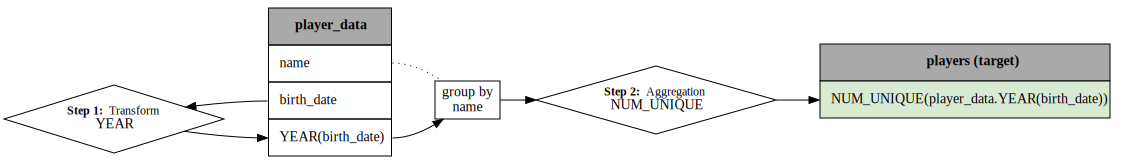

In [615]:
# Для кожної фічі можно побудувати граф та отримати опис фічі. Зробимо це останньої фічі.
print(f"Feature description: {ft.describe_feature(features_defs[-1])}")
ft.graph_feature(features_defs[-1])

In [617]:
# Тепер сгенеруємо матрицю нових фічей для датасету player_data
feature_matrix_player_data, features_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="player_data",
    max_depth=3,
)

In [618]:
player_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 0 to 4518
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_data_id  4519 non-null   int64         
 1   name            4519 non-null   string        
 2   year_start      4519 non-null   int64         
 3   year_end        4519 non-null   int64         
 4   position        4518 non-null   category      
 5   height          4519 non-null   category      
 6   weight          4519 non-null   float64       
 7   birth_date      4519 non-null   datetime64[ns]
 8   college         4519 non-null   category      
 9   years_total     4519 non-null   int64         
 10  retired_age     4519 non-null   int64         
 11  PER             4519 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(5), string(1)
memory usage: 392.2 KB


In [619]:
feature_matrix_player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 0 to 4518
Columns: 364 entries, year_start to players.NUM_UNIQUE(player_data.YEAR(birth_date))
dtypes: Int64(12), category(19), float64(329), int64(4)
memory usage: 12.4 MB


З 12 фічей було згенеровано 364 фічі.

Feature description: The number of unique elements in the year of the "birth_date" of all instances of "player_data" for each "Player" in "players" for the instance of "players" associated with this instance of "player_data".


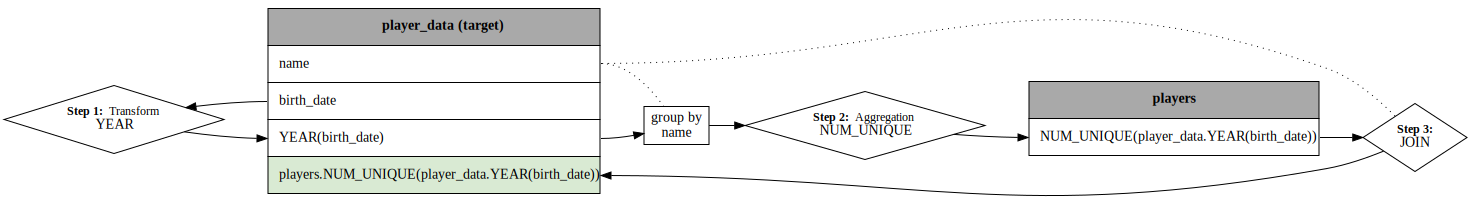

In [620]:
# Будуємо граф та опис для останньої фічі в датасеті.
print(f"Feature description: {ft.describe_feature(features_defs[-1])}")
ft.graph_feature(features_defs[-1])

In [621]:
# Тепер сгенеруємо матрицю нових фічей для датасету seasons_stats
feature_matrix_seasons_stats, features_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="seasons_stats",
    max_depth=3,
)

In [622]:
seasons_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   seasons_stats_id  24691 non-null  int64   
 1   Year              24691 non-null  float64 
 2   Player            24691 non-null  string  
 3   Pos               24691 non-null  category
 4   Age               24691 non-null  float64 
 5   Tm                24691 non-null  category
 6   G                 24691 non-null  float64 
 7   GS                24691 non-null  float64 
 8   MP                24691 non-null  float64 
 9   PER               24691 non-null  float64 
 10  TS%               24691 non-null  float64 
 11  3PAr              24691 non-null  float64 
 12  FTr               24691 non-null  float64 
 13  ORB%              24691 non-null  float64 
 14  DRB%              24691 non-null  float64 
 15  TRB%              24691 non-null  float64 
 16  AST%              2469

In [623]:
feature_matrix_seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Columns: 401 entries, Year to players.NUM_UNIQUE(player_data.YEAR(birth_date))
dtypes: Int64(12), category(14), float64(375)
memory usage: 74.0 MB


З 52 фічей було згенеровано 401 фічі.

Feature description: The number of unique elements in the year of the "birth_date" of all instances of "player_data" for each "Player" in "players" for the instance of "players" associated with this instance of "seasons_stats".


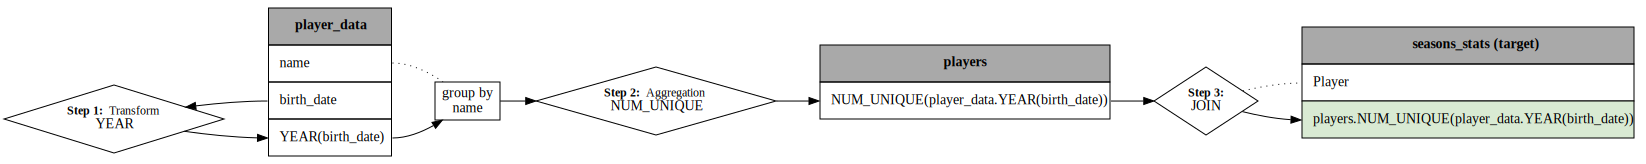

In [624]:
# Будуємо граф та опис для останньої фічі в датасеті.
print(f"Feature description: {ft.describe_feature(features_defs[-1])}")
ft.graph_feature(features_defs[-1])

# Висновок
Featuretools є дуже потужним інструментом для генерації нових фіч. Але на поточній версії документація не є дуже описовою, т.к. багато штук описаних в гайдах вже не працюють, а в документації часто відсутні наглядні приклади. Однак, не зважаючи на це, API є цілком зрозумілим.

Це надпотужний інструмент, який дозволяє розширити існуючий датасет додатковими фічами з зв'язаних датасетів. Також є корисні штуки для візуалізації нових фічей та навіть їх опис.